In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
iris = pd.read_csv("D:/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
iris = iris.sample(frac=1)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
41,42,4.5,2.3,1.3,0.3,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
7,8,5.0,3.4,1.5,0.2,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica


In [11]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


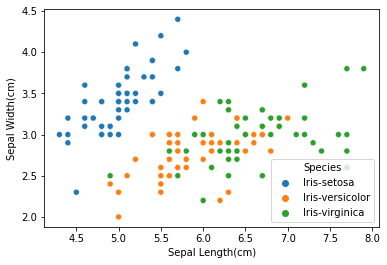

In [12]:
sns.scatterplot(x=iris["SepalLengthCm"], y=iris["SepalWidthCm"], hue=iris["Species"])
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.show()

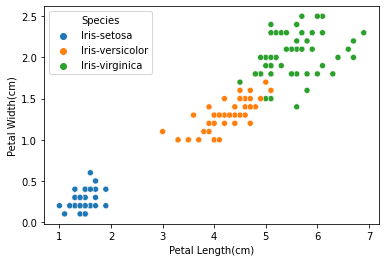

In [13]:
sns.scatterplot(x=iris["PetalLengthCm"], y=iris["PetalWidthCm"], hue=iris["Species"])
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.show()

In [14]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


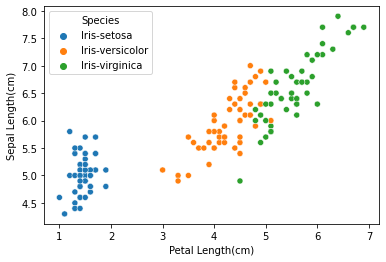

In [15]:
sns.scatterplot(x=iris["PetalLengthCm"], y=iris["SepalLengthCm"], hue=iris["Species"])
plt.xlabel("Petal Length(cm)")
plt.ylabel("Sepal Length(cm)")
plt.show()

In [16]:
iris_sample = iris.drop(["Id", "Species"], axis=1).values
species = iris["Species"].values

iris_sample[:5]

array([[4.5, 2.3, 1.3, 0.3],
       [5.9, 3. , 4.2, 1.5],
       [5. , 3.4, 1.5, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [6.4, 2.8, 5.6, 2.1]])

In [17]:
species[:5]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [18]:
from sklearn.cluster import KMeans

np.random.seed(42)


kmean = KMeans(n_clusters=3)


kmean.fit(iris_sample)

KMeans(n_clusters=3)

In [19]:
labels = kmean.predict(iris_sample)
labels[:5]

array([0, 1, 0, 0, 2])

In [20]:
df = pd.DataFrame({
    "labels": labels,
    "species": species
})
df.head()

,labels,species
0,0,Iris-setosa
1,1,Iris-versicolor
2,0,Iris-setosa
3,0,Iris-setosa
4,2,Iris-virginica


In [21]:
pd.crosstab(df["labels"], df["species"])

species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,50,0,0
1,0,48,14
2,0,2,36


In [22]:
kmean.inertia_

78.94084142614602

C:\Users\Devansh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


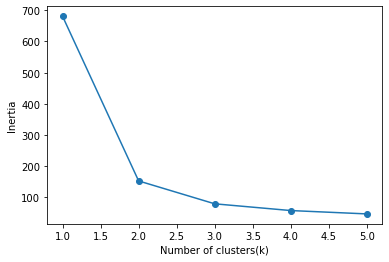

In [23]:
clusters = np.arange(1,6)
inertia = []

for c in clusters:
    model = KMeans(n_clusters=c)
    model.fit(iris_sample)
    inertia.append(model.inertia_)
    
plt.plot(clusters, inertia, marker="o")
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia")
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

np.random.seed(42)

kmeans = KMeans(n_clusters=3)
sc = StandardScaler()

# Pipeline
pipeline = make_pipeline(sc, kmeans)

# Fit the pipeline on the sample
pipeline.fit(iris_sample)

# Predictions
labels = pipeline.predict(iris_sample)

In [25]:
df = pd.DataFrame({
    "labels": labels,
    "species": species
})

# Crosstab
pd.crosstab(df["labels"], df["species"])

species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,11,36
1,50,0,0
2,0,39,14


In [34]:
iris["labels"] = labels
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
41,42,4.5,2.3,1.3,0.3,Iris-setosa,1
61,62,5.9,3.0,4.2,1.5,Iris-versicolor,2
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1
18,19,5.7,3.8,1.7,0.3,Iris-setosa,1
128,129,6.4,2.8,5.6,2.1,Iris-virginica,0


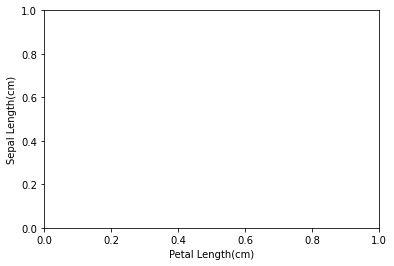

In [35]:
plt.xlabel("Petal Length(cm)")
plt.ylabel("Sepal Length(cm)")
plt.show()

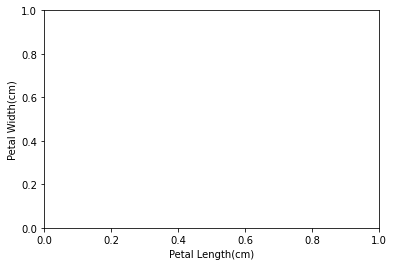

In [36]:
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.show()